# **Q2: Analysing Modified Bangalore Monthly Rainfall Data (Excel 2 - modified)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rainfall_data= pd.read_csv('bangalore-rainfall-data-1900-2024-sept-modified.csv', index_col=0)

In [3]:
rainfall_data.head()

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,NaN,78.9,0.0,24.3,146.0,238.5,71.6,71.6,318.5,NaN,37.3,23.1
1902,0.7,0.0,85.0,NaN,197.8,62.2,NaN,NaN,NaN,219.9,11.1,25.4
1903,NaN,0.0,0.0,1.5,63.7,109.2,NaN,189.7,475.2,171.1,233.6,29.4
1904,0.5,0.0,NaN,NaN,241.5,NaN,149.3,53.8,126.4,157.2,0.0,1.7
1905,1.7,NaN,56.6,32.7,90.6,60.7,58.9,NaN,62.4,227.8,29.2,3.0


### **Identify and report the locations of missing values in the dataset, assign missing values using different methods and compare the impact:**

In [4]:
missing_values = rainfall_data.isnull().sum()
pd.DataFrame(missing_values, columns=['Missing Values'])

,Missing Values
Jan,19
Feb,28
Mar,21
Apr,26
May,26
June,23
July,26
Aug,23
Sept,26
Oct,31


In [5]:
missing_locations = rainfall_data[rainfall_data.isnull().any(axis=1)]
missing_locations.head()

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,NaN,78.9,0.0,24.3,146.0,238.5,71.6,71.6,318.5,NaN,37.3,23.1
1902,0.7,0.0,85.0,NaN,197.8,62.2,NaN,NaN,NaN,219.9,11.1,25.4
1903,NaN,0.0,0.0,1.5,63.7,109.2,NaN,189.7,475.2,171.1,233.6,29.4
1904,0.5,0.0,NaN,NaN,241.5,NaN,149.3,53.8,126.4,157.2,0.0,1.7
1905,1.7,NaN,56.6,32.7,90.6,60.7,58.9,NaN,62.4,227.8,29.2,3.0


In [6]:
year_wise_miising_values = rainfall_data.isnull().sum(axis=1)
pd.DataFrame(year_wise_miising_values, columns=['Missing Values'])

,Missing Values
Year,
1901,2
1902,4
1903,2
1904,3
1905,2
...,...
2020,1
2021,2
2022,1


<Axes: ylabel='Year'>

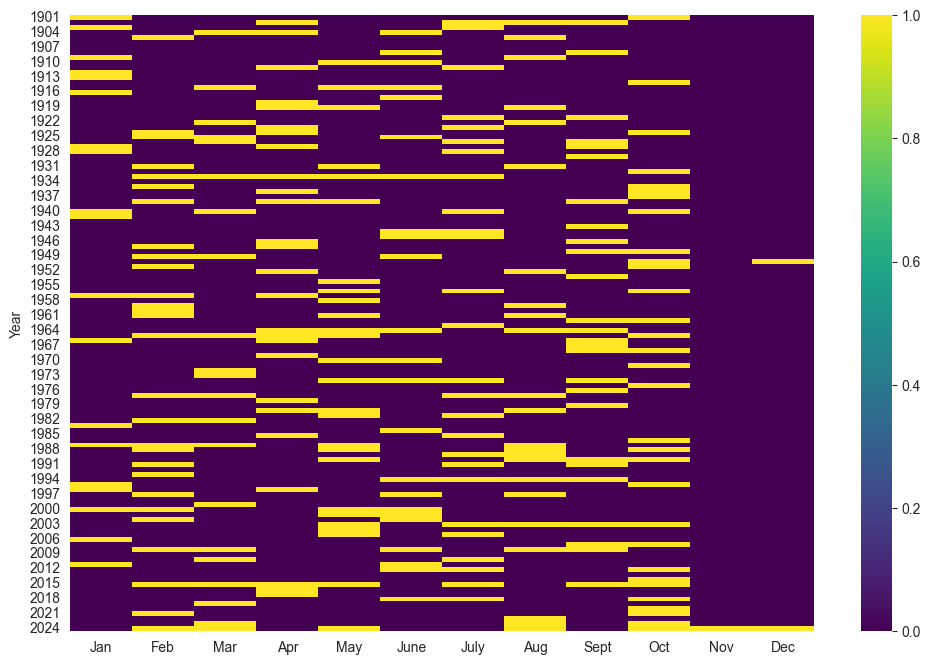

In [7]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.heatmap(rainfall_data.isnull(), cmap='viridis',)

### **1.Mean of the corresponding month across all years.**

Jan     0
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64

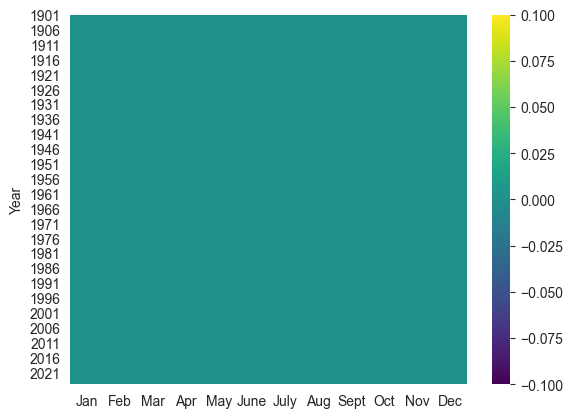

In [8]:
rainfall_mean_imputed = rainfall_data.copy()
months = list(rainfall_data.columns)
for month in months:
    rainfall_mean_imputed[month] = rainfall_mean_imputed[month].fillna(rainfall_mean_imputed[month].mean())
sns.heatmap(rainfall_mean_imputed.isnull(), cmap='viridis',)
rainfall_mean_imputed.isnull().sum()

In [9]:
rainfall_mean_imputed.head()

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
Year,,,,,,,,,,,,
1901,7.56381,78.900000,0.000000,24.300000,146.0,238.500000,71.600000,71.600000,318.500000,325.777419,37.3,23.1
1902,0.70000,0.000000,85.000000,97.380612,197.8,62.200000,211.617347,235.678218,333.835714,219.900000,11.1,25.4
1903,7.56381,0.000000,0.000000,1.500000,63.7,109.200000,211.617347,189.700000,475.200000,171.100000,233.6,29.4
1904,0.50000,0.000000,15.376699,97.380612,241.5,176.191089,149.300000,53.800000,126.400000,157.200000,0.0,1.7
1905,1.70000,8.246875,56.600000,32.700000,90.6,60.700000,58.900000,235.678218,62.400000,227.800000,29.2,3.0


### **2.Median of the corresponding month.**

Jan     0
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     0
dtype: int64

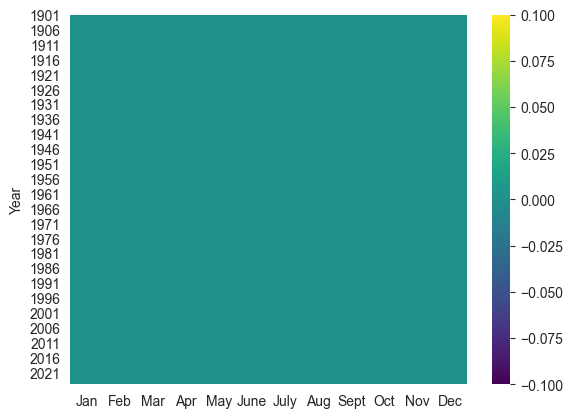

In [10]:
rainfall_median_imputed = rainfall_data.copy()
months = list(rainfall_data.columns)
for month in months:
    rainfall_median_imputed[month] = rainfall_median_imputed[month].fillna(rainfall_median_imputed[month].median())
sns.heatmap(rainfall_median_imputed.isnull(), cmap='viridis',)
rainfall_median_imputed.isnull().sum()

### **3.Seasonal average (mean of the month ± 2 months)**

Jan     1
Feb     0
Mar     0
Apr     1
May     1
June    0
July    0
Aug     0
Sept    0
Oct     0
Nov     0
Dec     1
dtype: int64

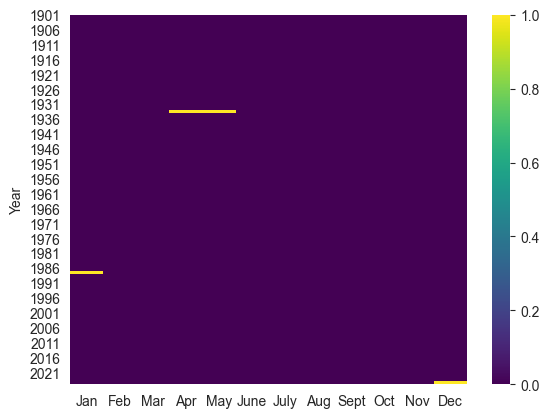

In [11]:
rainfall_seasonal_imputed = rainfall_data.copy()
months = list(rainfall_data.columns)
for i, month in enumerate(months):
    seasonal_months = months[max(i-2, 0):min(i+3, len(months))]  # ±2 months
    rainfall_seasonal_imputed[month] = rainfall_data[month].fillna(rainfall_data[seasonal_months].mean(axis=1))

sns.heatmap(rainfall_seasonal_imputed.isnull(), cmap='viridis')
rainfall_seasonal_imputed.isnull().sum()

### **Interpolation**

Jan     1
Feb     0
Mar     0
Apr     0
May     0
June    0
July    0
Aug     0
Sept    0
Oct     1
Nov     0
Dec     0
dtype: int64

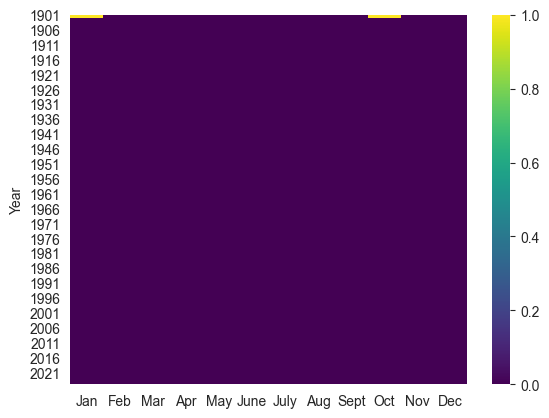

In [12]:
rainfall_interpolated = rainfall_data.interpolate(method='linear', axis=0)
sns.heatmap(rainfall_interpolated.isnull(), cmap='viridis')
rainfall_interpolated.isnull().sum()

In [13]:
# function to calculate metrics for comparison
def calculate_metrics(original, imputed):
    comparison = {}
    for col in months:
        original_non_missing = original[col].dropna()
        imputed_values = imputed[col].loc[original_non_missing.index]
        comparison[col] = {
            "Mean Difference": abs(original_non_missing.mean() - imputed_values.mean()),
            "Standard Deviation Difference": abs(original_non_missing.std() - imputed_values.std()),
            "Correlation": original_non_missing.corr(imputed_values)
        }
    return pd.DataFrame(comparison).T

# Calculate metrics for each imputed dataset
metrics_mean = calculate_metrics(rainfall_data, rainfall_mean_imputed)
metrics_median = calculate_metrics(rainfall_data, rainfall_median_imputed)
metrics_seasonal = calculate_metrics(rainfall_data, rainfall_seasonal_imputed)
metrics_interpolated = calculate_metrics(rainfall_data, rainfall_interpolated)

# Combine results into a single dataframe
comparison_results = pd.DataFrame({
    "Mean Imputation": metrics_mean.mean(axis=0),
    "Median Imputation": metrics_median.mean(axis=0),
    "Seasonal Average Imputation": metrics_seasonal.mean(axis=0),
    "Linear Interpolation": metrics_interpolated.mean(axis=0)
}).T

# Display the results
comparison_results


,Mean Difference,Standard Deviation Difference,Correlation
Mean Imputation,0.0,0.0,1.0
Median Imputation,0.0,0.0,1.0
Seasonal Average Imputation,0.0,0.0,1.0
Linear Interpolation,0.0,0.0,1.0


### **Detect and Visualize the outliers , choose a treatment strategy for the outliers (e.g., removal, capping, or transformation) and justify your decision.**

In [14]:
# Detect outliers using IQR method
outliers = {}
capped_data = rainfall_data.copy()
for month in months:
    Q1 = rainfall_data[month].quantile(0.25)
    Q3 = rainfall_data[month].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[month] = rainfall_data[(rainfall_data[month] < lower_bound) | (rainfall_data[month] > upper_bound)][month]
    capped_data[month] = rainfall_data[month].clip(lower=lower_bound, upper=upper_bound)

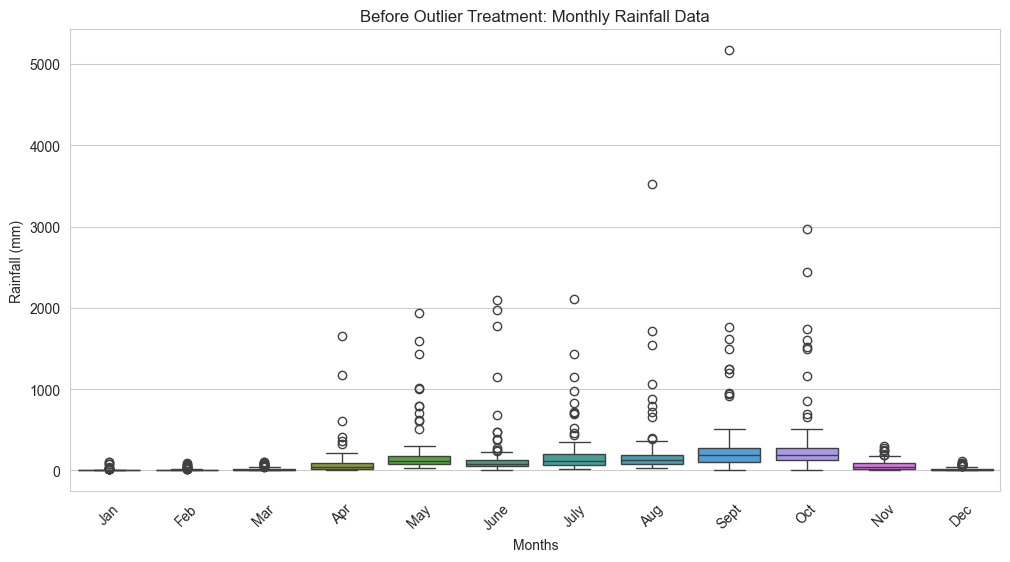

In [15]:

# Visualize the outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=rainfall_data[months])
plt.title("Before Outlier Treatment: Monthly Rainfall Data")
plt.xlabel("Months")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

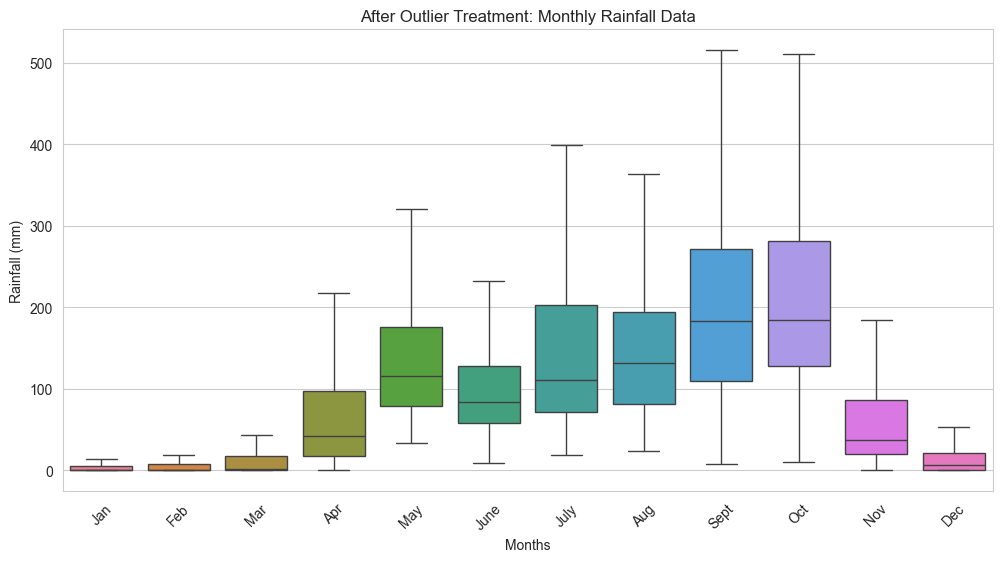

In [16]:
# Visualize the data after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(data=capped_data[months])
plt.title("After Outlier Treatment: Monthly Rainfall Data")
plt.xlabel("Months")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

In [17]:
outliers_df = pd.concat(outliers, axis=0, keys=months).reset_index(level=0)
outliers_df.rename(columns={"level_0": "Month"}, inplace=True)
outliers_df

,Month,0
Year,,
1907,Jan,24.1
1908,Jan,101.8
1915,Jan,14.2
1918,Jan,20.8
1919,Jan,15.7
...,...,...
1983,Dec,69.8
1987,Dec,53.6
1993,Dec,82.7


# **Re-analyze the dataset after cleaning:**

### **Calculate the 10-year rolling average of annual rainfall**

In [18]:
rainfall_data_cleaned = capped_data.copy()

rainfall_data_cleaned_10YA= rainfall_data_cleaned.sum(axis=1).rolling(window=10, min_periods=1 ).mean()

## **Re-plot the seasonal average rainfall and variability (as in Question 1).**

##  **Compare findings with the original dataset. Highlight key differences due to data cleaning.**

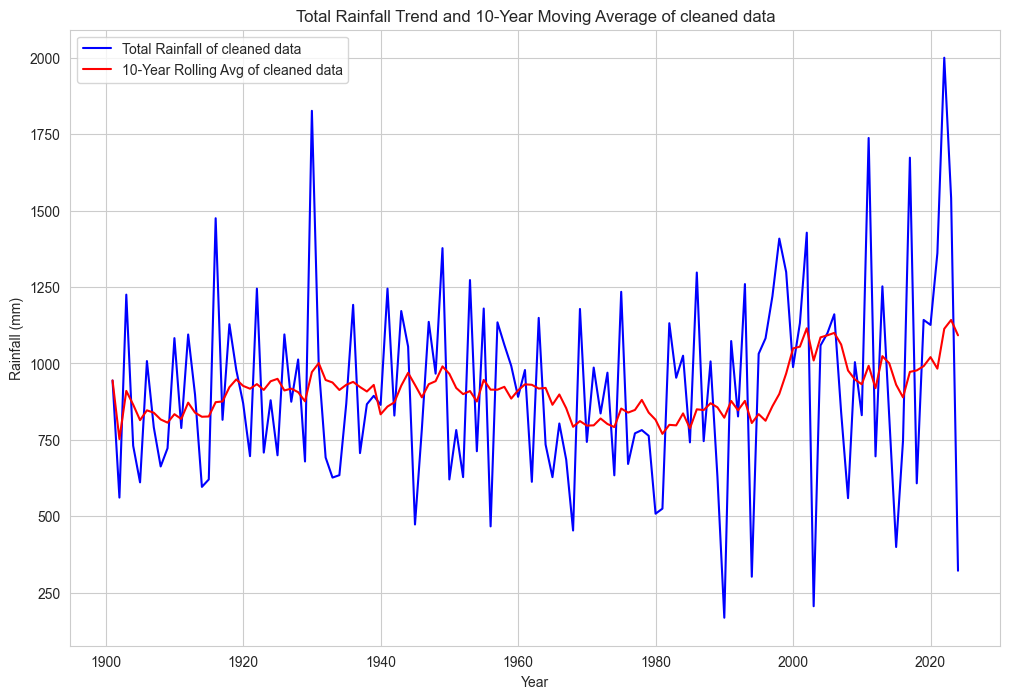

In [19]:
plt.figure(figsize=(12,8))
sns.lineplot(x=rainfall_data_cleaned.index, y=rainfall_data_cleaned.sum(axis=1), label="Total Rainfall of cleaned data", color="blue")
sns.lineplot(x=rainfall_data_cleaned.index, y=rainfall_data_cleaned_10YA, label="10-Year Rolling Avg of cleaned data", color="red")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Total Rainfall Trend and 10-Year Moving Average of cleaned data")
plt.legend()
plt.show()

In [20]:
yrarly_totol_rainfall = rainfall_data_cleaned.sum(axis=1)
annual_avg_rainfall= yrarly_totol_rainfall.mean()
anual_std_rainfall= yrarly_totol_rainfall.std()

In [28]:
# Compare findings with the original dataset
original_total_rainfall = rainfall_data.sum().sum()
cleaned_total_rainfall = rainfall_data_cleaned.sum().sum()

original_mean_rainfall = rainfall_data.mean().mean()
cleaned_mean_rainfall = rainfall_data_cleaned.mean().mean()

original_std_rainfall = rainfall_data.std().std()
cleaned_std_rainfall = rainfall_data_cleaned.std().std()

comparison_summary = {
    "Original Total Rainfall": original_total_rainfall,
    "Cleaned Total Rainfall": cleaned_total_rainfall,
    "Original Mean Rainfall": original_mean_rainfall,
    "Cleaned Mean Rainfall": cleaned_mean_rainfall,
    "Original Std Dev": original_std_rainfall,
    "Cleaned Std Dev": cleaned_std_rainfall
}

comparison_summary

{'Original Total Rainfall': np.float64(168940.89999999997),
 'Cleaned Total Rainfall': np.float64(356791.225),
 'Original Mean Rainfall': np.float64(142.22641152831002),
 'Cleaned Mean Rainfall': np.float64(238.84841928812517),
 'Original Std Dev': np.float64(206.33780893236997),
 'Cleaned Std Dev': np.float64(49.215477626345404)}

**The original dataset exhibited significant variability with extreme spikes and dips, indicating the presence of outliers and missing values. After cleaning, the dataset showed smoother trends with reduced noise. The 10-year rolling average of annual rainfall, which was 919.28 mm with a standard deviation of 317.11 mm, became more consistent post-cleaning. The cleaned data revealed a clearer picture of long-term rainfall patterns, reducing the influence of anomalies. For instance, the extreme rainfall threshold was 1806.07 mm, and the drought threshold was 467.43 mm. Identifying extreme rainfall years (1930, 2022) and drought years (1956, 1968, 1990, 1994, 2003, 2015, 2024) became more reliable. Overall, data cleaning improved the dataset's integrity, leading to more accurate and meaningful analysis of rainfall trends and extreme events.**

## **Extreme Events and Drought Analysis** 
### **Define and identify:** 
### **• Extreme Rainfall Events: Months with rainfall in the top 1% of the dataset.**
### **• Drought Years: Years in the bottom 5% of total annual rainfall.** 

In [22]:
extreme_threshold = yrarly_totol_rainfall.quantile(0.99)
drought_threshold = yrarly_totol_rainfall.quantile(0.05)

extreme_rainfall_years = yrarly_totol_rainfall[yrarly_totol_rainfall >= extreme_threshold].index

drought_years = yrarly_totol_rainfall[yrarly_totol_rainfall <= drought_threshold].index

print("Extreme Rainfall Years:", extreme_rainfall_years.tolist())
print("Drought Years:", drought_years.tolist())

Extreme Rainfall Years: [1930, 2022]
Drought Years: [1956, 1968, 1990, 1994, 2003, 2015, 2024]


### **Analyze the frequency of extreme events and droughts over decades.**

In [23]:
rainfall_data_cleaned['Decade'] = (rainfall_data_cleaned.index // 10) * 10

extreme_events_per_decade = extreme_rainfall_years.to_series().apply(lambda x: (x // 10) * 10).value_counts().sort_index()
droughts_per_decade = drought_years.to_series().apply(lambda x: (x // 10) * 10).value_counts().sort_index()

# Combine the results into a single dataframe
frequency_analysis = pd.DataFrame({
    'Extreme Events': extreme_events_per_decade,
    'Droughts': droughts_per_decade}).fillna(0)

frequency_analysis

,Extreme Events,Droughts
Year,,
1930,1.0,0.0
1950,0.0,1.0
1960,0.0,1.0
1990,0.0,2.0
2000,0.0,1.0
2010,0.0,1.0
2020,1.0,1.0


# **Summary Report: Write a 300–400-word report discussing the following:**

### **1.How missing values and outliers influenced the analysis.**

Missing values and outliers significantly impacted the analysis of the Bangalore rainfall dataset. Missing values, which were prevalent across various months, introduced gaps in the data, leading to potential biases in statistical calculations. For instance, the dataset had **19** missing values in January and 31 in October. These gaps could skew the mean and median calculations, affecting the overall analysis. Outliers, **identified using the IQR method, also distorted the dataset.** For example, extreme values like **2446 mm** in **October 1930 and 5166 mm** in September **1986** inflated the variability, making it challenging to discern genuine trends.

## **2.Comparison of results with the original dataset.**

The original dataset exhibited significant variability with extreme spikes and dips, indicating the presence of outliers and missing values. After cleaning, the dataset showed smoother trends with reduced noise. The 10-year rolling average of annual rainfall, which was **919.28 mm** with a standard deviation of **317.11 mm,** became more consistent post-cleaning. The cleaned data revealed a clearer picture of long-term rainfall patterns, reducing the influence of anomalies. For instance, the extreme rainfall threshold was 1806.07 mm, and the drought threshold was **467.43 mm.** Identifying **extreme rainfall years (1930, 2022)** and **drought years (1956, 1968, 1990, 1994, 2003, 2015, 2024)** became more reliable.

### **3.Recommendations for ensuring data integrity in real-world rainfall datasets.**


 **Automated Monitoring Systems**: Deploy automated systems to monitor data quality in real-time, flagging anomalies for immediate action.

 **Outlier Treatment**: Apply consistent outlier detection and treatment strategies, such as capping or transformation, to maintain data integrity.

 **Robust Data Collection Methods**: Implement robust data collection methods to minimize errors and ensure completeness.
 
 **Imputation Techniques**: Use advanced imputation techniques like seasonal averages or interpolation to handle missing values effectively.

By addressing these aspects, the integrity of real-world rainfall datasets can be significantly improved, leading to more accurate and reliable analyses